In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
palette=sns.diverging_palette(30, 250, s=80, l=65, center="light", as_cmap=True)
sns.set_theme()

In [9]:
filename='D:/Python/Data_Africa.csv'
africa=pd.read_csv(filename)
africa.info()
africa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1334 non-null   int64  
 1   Year         1334 non-null   int64  
 2   Country      1334 non-null   object 
 3   Continent    1334 non-null   object 
 4   Population   1334 non-null   int64  
 5   GDP (USD)    1179 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 62.7+ KB


,ID,Year,Country,Continent,Population,GDP (USD)
0,1,2000,Uganda,East Africa,23303189,6.193247e+09
1,2,2001,Uganda,East Africa,24022603,5.840504e+09
2,3,2002,Uganda,East Africa,24781316,5.840504e+09
3,4,2003,Uganda,East Africa,25577246,6.606884e+09
4,5,2004,Uganda,East Africa,26403221,7.939488e+09


In [10]:
africa=africa.drop('ID',axis=1)

In [11]:
africa[africa['GDP (USD)'].isnull()]

,Year,Country,Continent,Population,GDP (USD)
207,2000,Mayotte,East Africa,147645,NaN
208,2001,Mayotte,East Africa,153066,NaN
209,2002,Mayotte,East Africa,158502,NaN
210,2003,Mayotte,East Africa,163982,NaN
211,2004,Mayotte,East Africa,169545,NaN
...,...,...,...,...,...
1260,2018,"Saint Helena, Ascension and Tristan da Cunha",West Africa,6024,NaN
1261,2019,"Saint Helena, Ascension and Tristan da Cunha",West Africa,6050,NaN
1262,2020,"Saint Helena, Ascension and Tristan da Cunha",West Africa,6066,NaN
1263,2021,"Saint Helena, Ascension and Tristan da Cunha",West Africa,6089,NaN


In [12]:
not_fully_recognized=africa['Country'].isin(['Mayotte','Reunion','Saint Helena, Ascension and Tristan da Cunha','SADR'])
africa=africa[~not_fully_recognized]
africa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 1333
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1242 non-null   int64  
 1   Country      1242 non-null   object 
 2   Continent    1242 non-null   object 
 3   Population   1242 non-null   int64  
 4   GDP (USD)    1179 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 58.2+ KB


In [13]:
africa['GDP (USD)'].fillna(africa['GDP (USD)'].mean(), inplace = True)
africa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 1333
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1242 non-null   int64  
 1   Country      1242 non-null   object 
 2   Continent    1242 non-null   object 
 3   Population   1242 non-null   int64  
 4   GDP (USD)    1242 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 58.2+ KB


In [14]:
africa_year = africa[africa['Year'] == 2022]
africa_sorted = africa_year.sort_values(by='GDP (USD)', ascending=False)
top_10_nations = africa_sorted.head(10)

In [15]:
initial_africa_year = africa[africa['Year'] == 2000]
initial_africa_sorted = initial_africa_year.sort_values(by='GDP (USD)', ascending=False)
initial_top_10_nations = initial_africa_sorted.head(10)

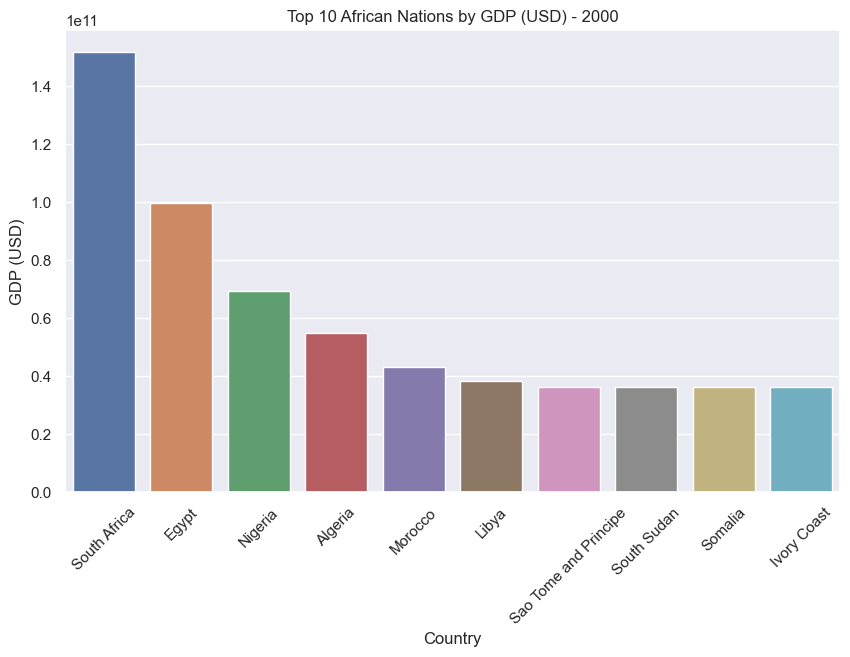

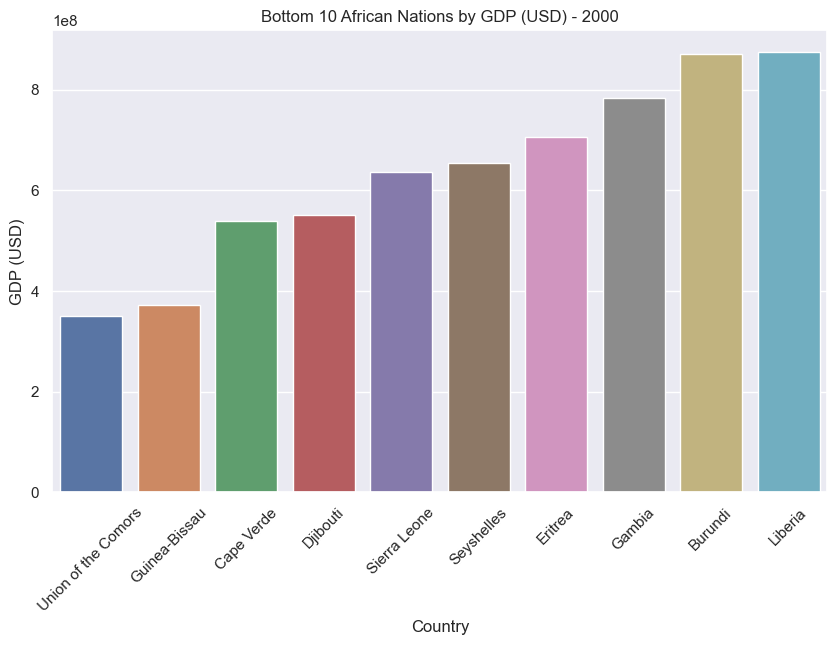

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='GDP (USD)', data=initial_top_10_nations)
plt.title(f'Top 10 African Nations by GDP (USD) - {2000}')
plt.xticks(rotation=45)
plt.ylabel('GDP (USD)')
plt.show()

initial_bottom_10_nations = initial_africa_sorted.tail(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='GDP (USD)', data=initial_bottom_10_nations, order=initial_bottom_10_nations.sort_values(by='GDP (USD)', ascending=True)['Country'].tolist())
plt.title(f'Bottom 10 African Nations by GDP (USD) - {2000}')
plt.xticks(rotation=45)
plt.ylabel('GDP (USD)')
plt.show()

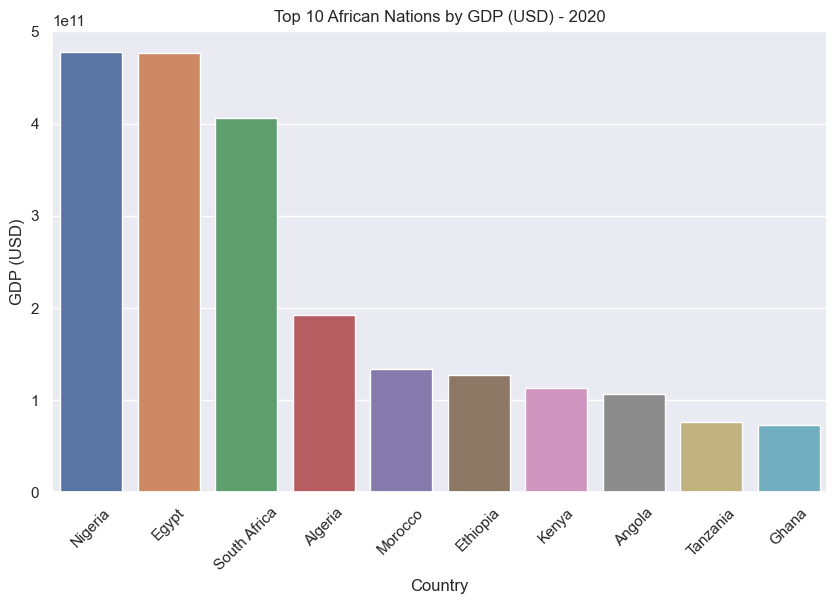

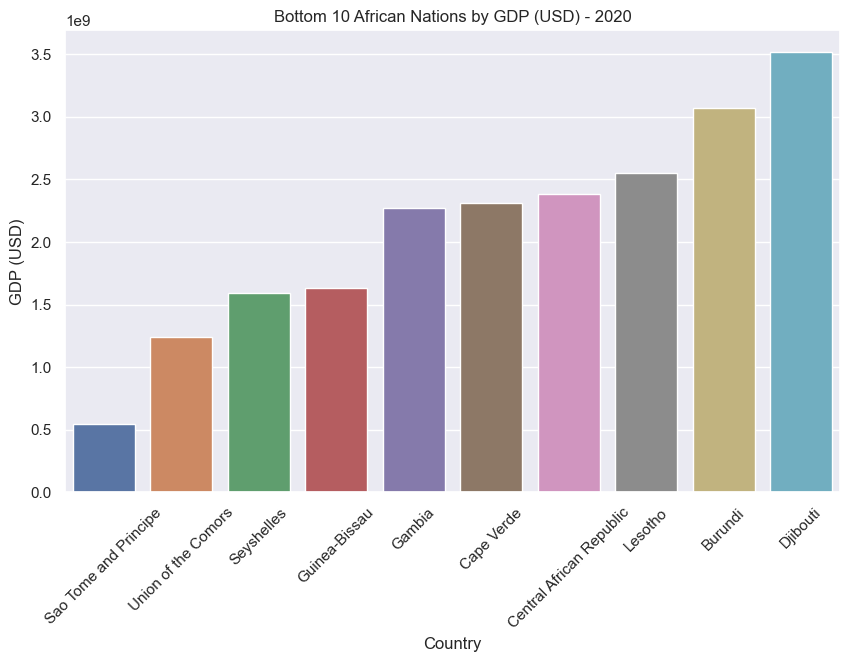

In [35]:
# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='GDP (USD)', data=top_10_nations)
plt.title(f'Top 10 African Nations by GDP (USD) - {2020}')
plt.xticks(rotation=45)
plt.ylabel('GDP (USD)')
plt.show()

bottom_10_nations = africa_sorted.tail(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='GDP (USD)', data=bottom_10_nations, order=bottom_10_nations.sort_values(by='GDP (USD)', ascending=True)['Country'].tolist())
plt.title(f'Bottom 10 African Nations by GDP (USD) - {2020}')
plt.xticks(rotation=45)
plt.ylabel('GDP (USD)')
plt.show()

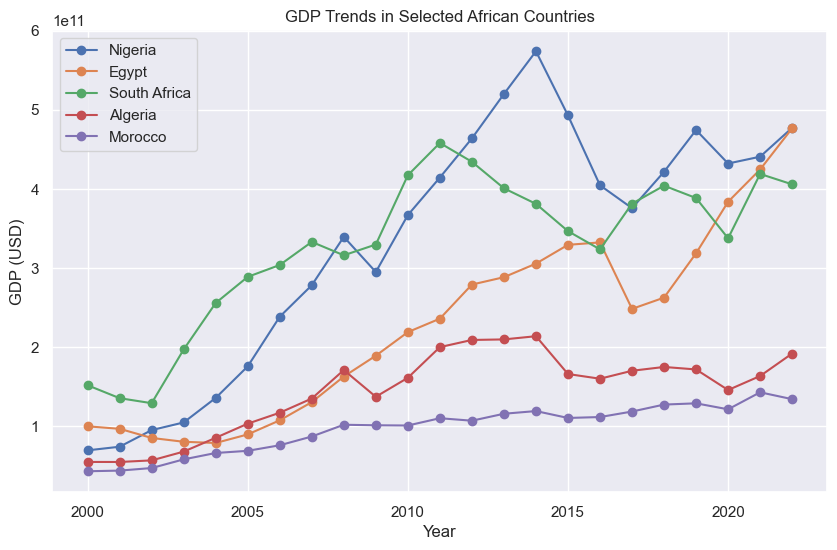

In [36]:
# List of countries to plot
countries = ['Nigeria','Egypt', 'South Africa', 'Algeria', 'Morocco']

# Create a line plot for multiple countries
plt.figure(figsize=(10, 6))

for country in countries:
    country_data = africa[africa['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP (USD)'], marker='o', label=country)

plt.title('GDP Trends in Selected African Countries')
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.legend()
plt.grid(True)
plt.show()

